# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Research Paper Summarization Engine** |

# II. Notebook Target Definition

This notebook focuses on the the exploratory data analysis (EDA) and preprocessing steps essential for the Research Paper Summarization Engine Project. Initial steps included a thorough search for and subsequent handling of any duplicate entries to maintain data integrity. We streamlined the dataset by removing irrelevant columns and refining the data into a format suitable for our modeling task. To visually explore the dataset's content, we generated word clouds, offering insights into the most prevalent words across our collection of research papers, hence providing a glimpse into the thematic focus of the corpus. Additionally, we delved into the readability of the texts by computing the Flesch-Kincaid Grade Level and Gunning Fog Index, which afforded us a quantitative grasp of the textual complexity within our dataset.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from syllables import estimate
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
train_df = pd.read_pickle('../../data/processed/train_df.pkl')
test_df= pd.read_pickle('../../data/processed/test_df.pkl')
validation_df = pd.read_pickle('../../data/processed/validation_df.pkl')

In [3]:
train_df.head()

,source,source_labels,rouge_scores,paper_id,target
0,[Due to the success of deep learning to solvin...,"[0, 0, 0, 0, 1, 0]","[0.30188679695129395, 0.3720930218696594, 0.60...",SysEexbRb,[We provide necessary and sufficient analytica...
1,[The backpropagation (BP) algorithm is often t...,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.1304347813129425, 0.1428571343421...",SygvZ209F7,"[Biologically plausible learning algorithms, p..."
2,"[We introduce the 2-simplicial Transformer, an...","[0, 1]","[0.3333333432674408, 0.8888888955116272]",rkecJ6VFvr,[We introduce the 2-simplicial Transformer and...
3,"[We present Tensor-Train RNN (TT-RNN), a novel...","[0, 0, 0, 1, 0, 0]","[0.06666666269302368, 0.06451612710952759, 0.0...",HJJ0w--0W,[Accurate forecasting over very long time hori...
4,[Recent efforts on combining deep models with ...,"[0, 1, 0, 0, 0, 0, 0]","[0.277777761220932, 0.5714285373687744, 0.0952...",HyH9lbZAW,[We propose a variational message-passing algo...


In [4]:
test_df.head()

,source,source_labels,rouge_scores,paper_id,target
0,[Incremental class learning involves sequentia...,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0.2857142686843872, 0.1818181723356247, 0.227...",SJ1Xmf-Rb,"[FearNet is a memory efficient neural-network,..."
1,[Multi-view learning can provide self-supervis...,"[1, 0, 0, 0, 0, 0]","[0.20000000298023224, 0.0, 0.15789473056793213...",S1xzyhR9Y7,[Multi-view learning improves unsupervised sen...
2,[We show how discrete objects can be learnt in...,"[1, 0, 0, 0, 0]","[0.978723406791687, 0.3333333432674408, 0.4150...",HJDUjKeA-,[We show how discrete objects can be learnt in...
3,[Most recent gains in visual recognition have ...,"[0, 0, 1, 0, 0, 0]","[0.11764705181121826, 0.1463414579629898, 0.19...",BJgLg3R9KQ,[A large-scale dataset for training attention ...
4,"[In recent years, deep neural networks have de...","[0, 0, 1, 0, 0, 0, 0, 0]","[0.0, 0.05882352590560913, 0.2702702581882477,...",BklpOo09tQ,[We proposed a time-efficient defense method a...


In [5]:
validation_df.head()

,source,source_labels,rouge_scores,paper_id,target
0,[Mixed precision training (MPT) is becoming a ...,"[0, 0, 0, 1, 0, 0]","[0.23999999463558197, 0.260869562625885, 0.199...",rJlnfaNYvB,[We devise adaptive loss scaling to improve mi...
1,"[Many real-world problems, e.g. object detecti...","[0, 0, 1, 0, 0]","[0.05405404791235924, 0.2926829159259796, 0.97...",rJVoEiCqKQ,[We present a novel approach for learning to p...
2,[Foveation is an important part of human visio...,"[0, 0, 1, 0, 0]","[0.11764705181121826, 0.11764705181121826, 0.3...",rkldVXKU8H,[We compare object recognition performance on ...
3,[We explore the concept of co-design in the co...,"[0, 1, 0, 0, 0, 0]","[0.1249999925494194, 0.4888888895511627, 0.204...",BJfIVjAcKm,[We develop methods to train deep neural model...
4,[Batch Normalization (BatchNorm) has shown to ...,"[0, 0, 1, 0, 0, 0]","[0.19999998807907104, 0.23999999463558197, 0.4...",BJlEEaEFDS,[Investigation of how BatchNorm causes adversa...


# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [6]:
train_df.shape, test_df.shape, validation_df.shape

((1992, 5), (618, 5), (619, 5))

## IV.B. Data Information Inspection

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   source         1992 non-null   object
 1   source_labels  1992 non-null   object
 2   rouge_scores   1992 non-null   object
 3   paper_id       1992 non-null   object
 4   target         1992 non-null   object
dtypes: object(5)
memory usage: 77.9+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   source         618 non-null    object
 1   source_labels  618 non-null    object
 2   rouge_scores   618 non-null    object
 3   paper_id       618 non-null    object
 4   target         618 non-null    object
dtypes: object(5)
memory usage: 24.3+ KB


In [9]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   source         619 non-null    object
 1   source_labels  619 non-null    object
 2   rouge_scores   619 non-null    object
 3   paper_id       619 non-null    object
 4   target         619 non-null    object
dtypes: object(5)
memory usage: 24.3+ KB


## IV.C. Duplicated Values Inspection

In [10]:
train_duplicated = train_df[train_df.duplicated(subset="source", keep=False)]
train_duplicated.shape

(2, 5)

In [11]:
train_duplicated

,source,source_labels,rouge_scores,paper_id,target
1060,[We present SOSELETO (SOurce SELEction for Tar...,"[1, 0, 0, 0, 0, 0]","[0.22857142984867096, 0.11764705181121826, 0.1...",Hye-LiR5Y7,[Learning with limited training data by exploi...
1531,[We present SOSELETO (SOurce SELEction for Tar...,"[1, 0, 0, 0, 0, 0]","[0.22857142984867096, 0.11764705181121826, 0.1...",r1lqA-OSvV,[Learning with limited training data by exploi...


In [12]:
test_duplicated = test_df[test_df.duplicated(subset="source", keep=False)]
test_duplicated.shape

(0, 5)

In [13]:
test_duplicated

,source,source_labels,rouge_scores,paper_id,target


In [14]:
validation_duplicated = validation_df[validation_df.duplicated(subset="source", keep=False)]
validation_duplicated.shape

(2, 5)

In [15]:
validation_duplicated

,source,source_labels,rouge_scores,paper_id,target
126,[Despite an ever growing literature on reinfor...,"[0, 0, 0, 1, 0]","[0.1428571343421936, 0.3589743673801422, 0.093...",r1ez_K1wPH,[We investigate the large-sample behaviors of ...
571,[Despite an ever growing literature on reinfor...,"[0, 0, 0, 1, 0]","[0.1428571343421936, 0.3589743673801422, 0.093...",rygw7aNYDS,[We investigate the large-sample behaviors of ...


### IV.C.1. Duplicated Values Handling

In [16]:
def drop_duplicates(df, subset):
    df = df.drop_duplicates(subset=[subset], keep='first')
    return df

In [17]:
train_df = drop_duplicates(train_df, "source")
validation_df = drop_duplicates(validation_df, "source")
train_df.shape, validation_df.shape

((1991, 5), (618, 5))

## IV.D. Preprocessing

### IV.D.1. Unused Column Removal

In [18]:
def unused_column_removal(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df

In [19]:
cols_to_remove = ["source_labels", "rouge_scores", "paper_id"]

In [20]:
unused_column_removal(train_df, cols_to_remove)
unused_column_removal(test_df, cols_to_remove)
unused_column_removal(validation_df, cols_to_remove)
train_df.shape, test_df.shape, validation_df.shape

((1991, 2), (618, 2), (618, 2))

In [21]:
train_df.head()

,source,target
0,[Due to the success of deep learning to solvin...,[We provide necessary and sufficient analytica...
1,[The backpropagation (BP) algorithm is often t...,"[Biologically plausible learning algorithms, p..."
2,"[We introduce the 2-simplicial Transformer, an...",[We introduce the 2-simplicial Transformer and...
3,"[We present Tensor-Train RNN (TT-RNN), a novel...",[Accurate forecasting over very long time hori...
4,[Recent efforts on combining deep models with ...,[We propose a variational message-passing algo...


In [22]:
test_df.head()

,source,target
0,[Incremental class learning involves sequentia...,"[FearNet is a memory efficient neural-network,..."
1,[Multi-view learning can provide self-supervis...,[Multi-view learning improves unsupervised sen...
2,[We show how discrete objects can be learnt in...,[We show how discrete objects can be learnt in...
3,[Most recent gains in visual recognition have ...,[A large-scale dataset for training attention ...
4,"[In recent years, deep neural networks have de...",[We proposed a time-efficient defense method a...


In [23]:
validation_df.head()

,source,target
0,[Mixed precision training (MPT) is becoming a ...,[We devise adaptive loss scaling to improve mi...
1,"[Many real-world problems, e.g. object detecti...",[We present a novel approach for learning to p...
2,[Foveation is an important part of human visio...,[We compare object recognition performance on ...
3,[We explore the concept of co-design in the co...,[We develop methods to train deep neural model...
4,[Batch Normalization (BatchNorm) has shown to ...,[Investigation of how BatchNorm causes adversa...


### IV.D.2. Data Cleaning

In [24]:
def clean_sentences(sentence_list):
    text = " ".join(sentence.strip() for sentence in sentence_list if sentence)
    if text and not text.endswith("."):
        text += "."
    return text

def apply_cleaning(df, source, target):
    df[source] = df[source].apply(clean_sentences)
    df[target] = df[target].apply(clean_sentences)
    return df

In [25]:
train_df = apply_cleaning(train_df, "source", "target")
test_df = apply_cleaning(test_df, "source", "target")
validation_df = apply_cleaning(validation_df, "source", "target")

In [26]:
train_df.head()

,source,target
0,Due to the success of deep learning to solving...,We provide necessary and sufficient analytical...
1,The backpropagation (BP) algorithm is often th...,"Biologically plausible learning algorithms, pa..."
2,"We introduce the 2-simplicial Transformer, an ...",We introduce the 2-simplicial Transformer and ...
3,"We present Tensor-Train RNN (TT-RNN), a novel ...",Accurate forecasting over very long time horiz...
4,Recent efforts on combining deep models with p...,We propose a variational message-passing algor...


In [27]:
test_df.head()

,source,target
0,Incremental class learning involves sequential...,"FearNet is a memory efficient neural-network, ..."
1,Multi-view learning can provide self-supervisi...,Multi-view learning improves unsupervised sent...
2,We show how discrete objects can be learnt in ...,We show how discrete objects can be learnt in ...
3,Most recent gains in visual recognition have o...,A large-scale dataset for training attention m...
4,"In recent years, deep neural networks have dem...",We proposed a time-efficient defense method ag...


In [28]:
validation_df.head()

,source,target
0,Mixed precision training (MPT) is becoming a p...,We devise adaptive loss scaling to improve mix...
1,"Many real-world problems, e.g. object detectio...",We present a novel approach for learning to pr...
2,Foveation is an important part of human vision...,We compare object recognition performance on i...
3,We explore the concept of co-design in the con...,We develop methods to train deep neural models...
4,Batch Normalization (BatchNorm) has shown to b...,Investigation of how BatchNorm causes adversar...


## IV.E. Data Visualization

### IV.E.1. Word Cloud in Original Papers in Train Set

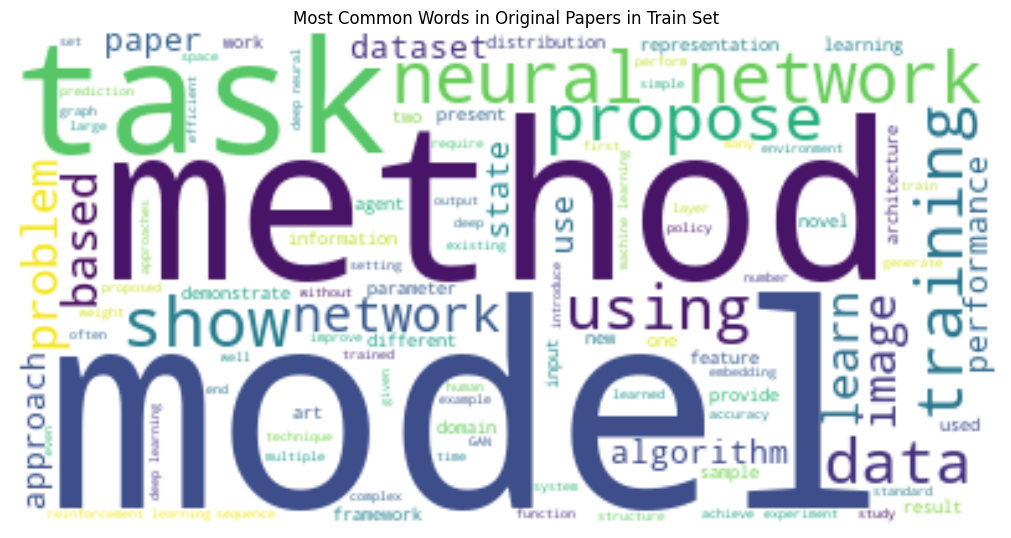

In [29]:
text = " ".join(train_df["source"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Original Papers in Train Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.2. Word Cloud in Summaries in Train Set

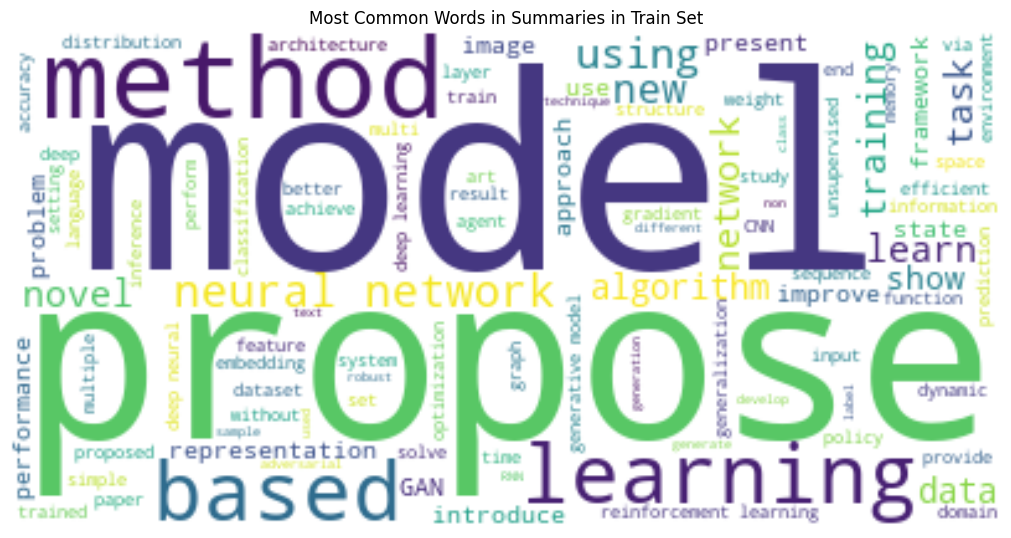

In [30]:
text = " ".join(train_df["target"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Summaries in Train Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.3. Word Cloud in Original Papers in Test Set

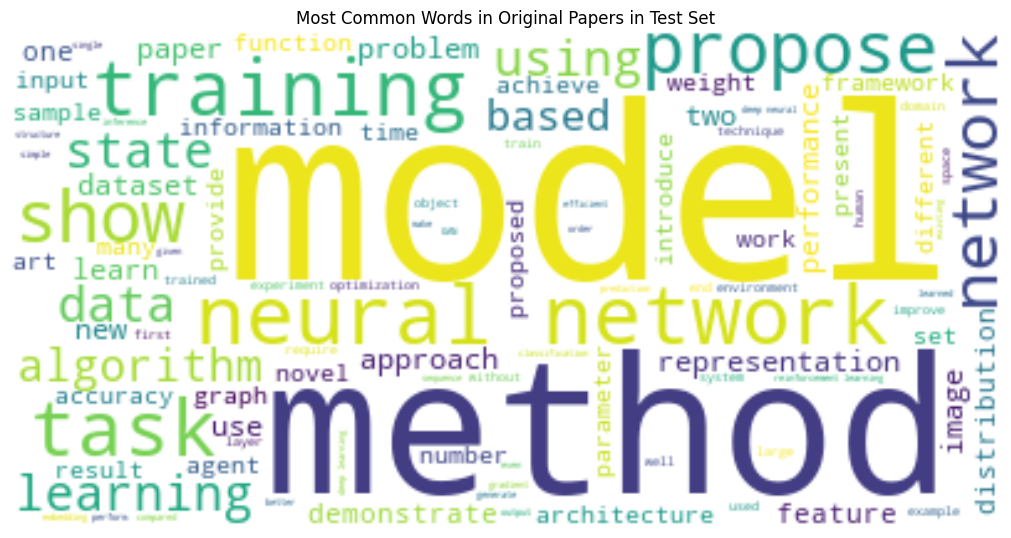

In [31]:
text = " ".join(test_df["source"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Original Papers in Test Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.4. Word Cloud in Summaries in Test Set

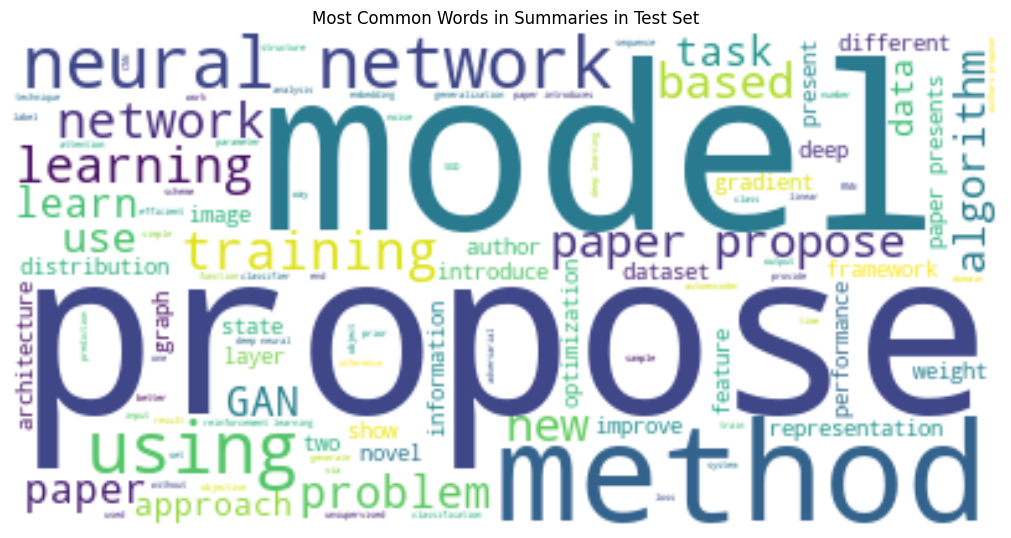

In [32]:
text = " ".join(test_df["target"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Summaries in Test Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.5. Word Cloud in Original Papers in Validation Set

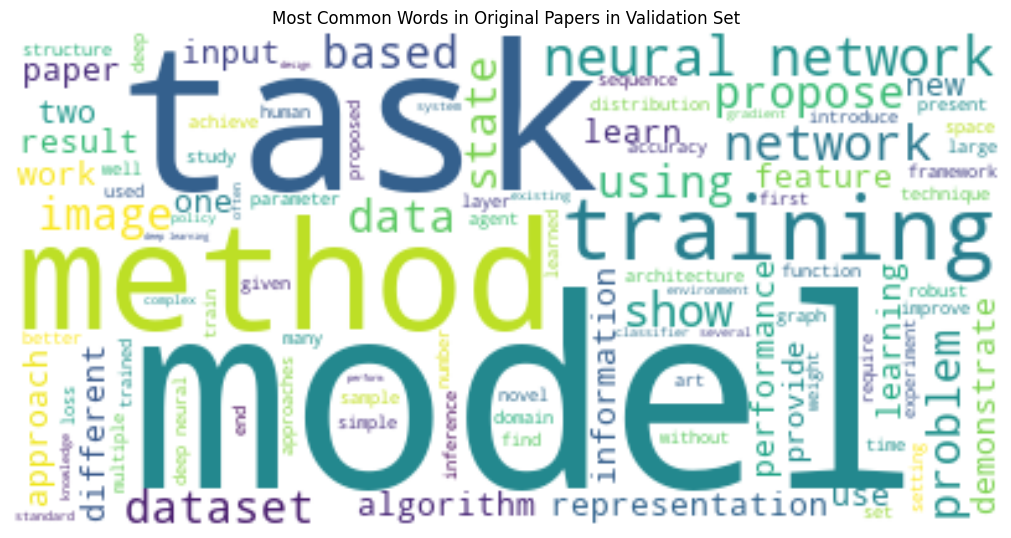

In [33]:
text = " ".join(validation_df["source"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Original Papers in Validation Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.6. Word Cloud in Summaries in Validation Set

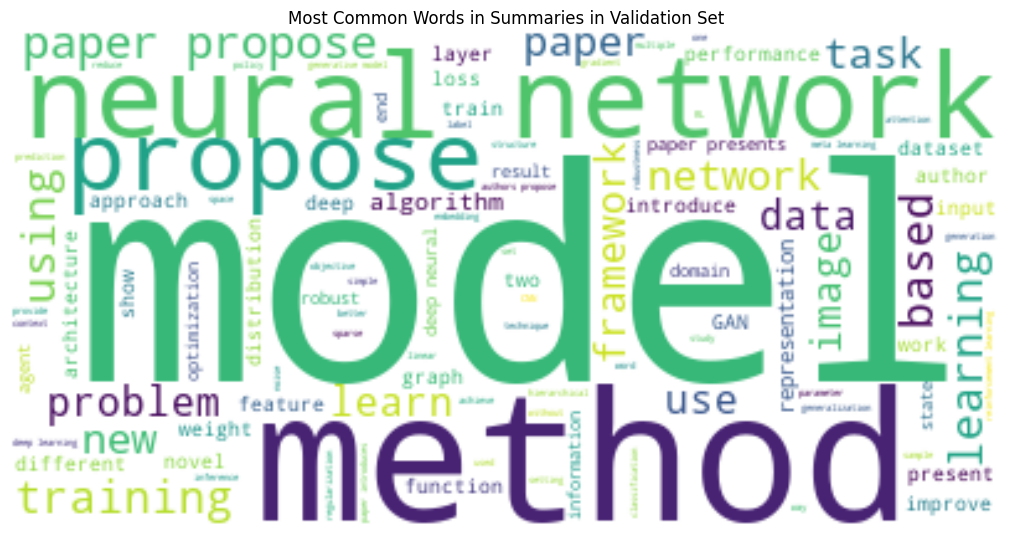

In [34]:
text = " ".join(validation_df["target"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Summaries in Validation Set")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.7. Flesch-Kincaid Grade Level and Gunning Fog Index Analysis

In [35]:
def calculate_readability_scores(text):
    sentences = re.split(r'[.!?]+', text)
    num_sentences = max(1, len([sentence for sentence in sentences if sentence.strip()]))
    words = text.split()
    num_words = len(words)
    num_syllables = sum(estimate(word) for word in words)
    num_complex_words = sum(1 for word in words if estimate(word) >= 3)
    flesch_kincaid_grade_level = 0.39 * (num_words / num_sentences) + 11.8 * (num_syllables / num_words) - 15.59
    gunning_fog_index = 0.4 * ((num_words / num_sentences) + 100 * (num_complex_words / num_words))
    return flesch_kincaid_grade_level, gunning_fog_index


def analyze_readability(df, text_column):
    readability_scores = df[text_column].apply(calculate_readability_scores)
    scores_df = pd.DataFrame(readability_scores.tolist(), columns=["Flesch-Kincaid Grade", "Gunning Fog Index"])
    average_fk_grade = scores_df["Flesch-Kincaid Grade"].mean()
    average_gf_index = scores_df["Gunning Fog Index"].mean()
    readability_results = {
        "average_fk_grade": average_fk_grade,
        "average_gf_index": average_gf_index
    }
    return readability_results, scores_df


def create_readability_summary(dfs, columns):
    summary_data = []
    for df_name, df in dfs.items():
        for column in columns:
            readability_results, _ = analyze_readability(df, column)
            summary_data.append({
                "DataFrame": df_name,
                "Column": column,
                "Average Flesch-Kincaid Grade": readability_results["average_fk_grade"],
                "Average Gunning Fog Index": readability_results["average_gf_index"]
            })
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [36]:
dfs = {
    "train": train_df,
    "test": test_df,
    "validation": validation_df
}
columns = ["source", "target"]

In [37]:
readability_summary = create_readability_summary(dfs, columns)
readability_summary

,DataFrame,Column,Average Flesch-Kincaid Grade,Average Gunning Fog Index
0,train,source,17.354178,21.071245
1,train,target,17.350537,21.023450
2,test,source,17.278503,21.013727
3,test,target,19.187707,22.714796
4,validation,source,17.239534,20.902594
5,validation,target,18.655769,22.245761


## IV.F. Export Data

In [38]:
train_df.to_pickle('../../data/processed/train_df_processed.pkl')
test_df.to_pickle('../../data/processed/test_df_processed.pkl')
validation_df.to_pickle('../../data/processed/validation_df_processed.pkl')